In [15]:
# Importing libraries that will be used

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [16]:
# Importing the required data to create the graphs

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

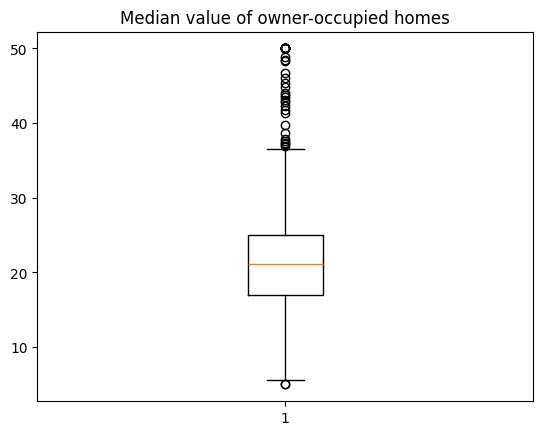

In [38]:
# Creating a boxplot for median value of owner-occupied homes

plt.boxplot(boston_df.MEDV)
plt.title('Median value of owner-occupied homes')
plt.show()

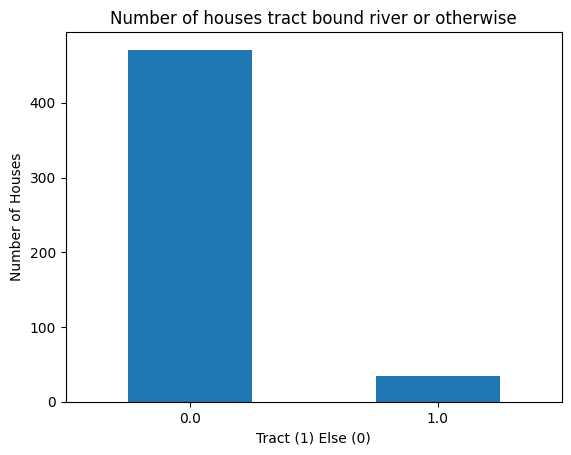

In [25]:
# Creating Bar plot for Charles River
boston_df['CHAS'].value_counts().plot.bar(rot=0)
plt.title("Number of houses tract bound river or otherwise")

plt.ylabel("Number of Houses")
plt.xlabel("Tract (1) Else (0)")
plt.show()

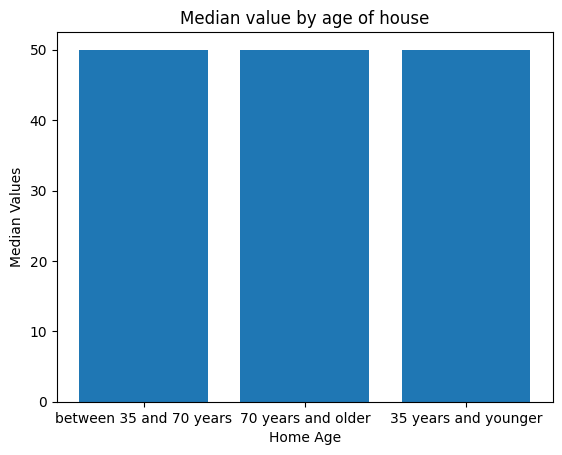

In [29]:
# Creating Box Plot for MEDV v AGE

interval_range = pd.interval_range(start=0, freq=35,end=105)
labels=['35 years and younger','between 35 and 70 years','70 years and older']
boston_df['age_bin'] = pd.cut(boston_df['AGE'], bins=interval_range)
boston_df['age_bin']  = boston_df['age_bin'].map(dict(zip(interval_range,labels)))

plt.bar(boston_df.age_bin,boston_df.MEDV)
plt.title("Median value by age of house")
plt.xlabel("Home Age") #xlabel
plt.ylabel("Median Values")
plt.show()

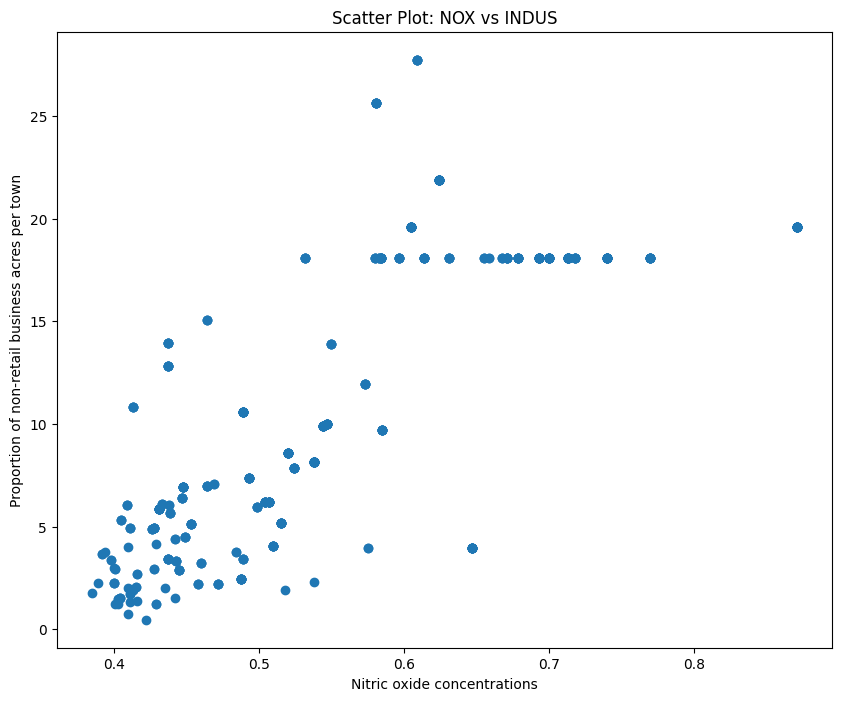

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('Nitric oxide concentrations')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

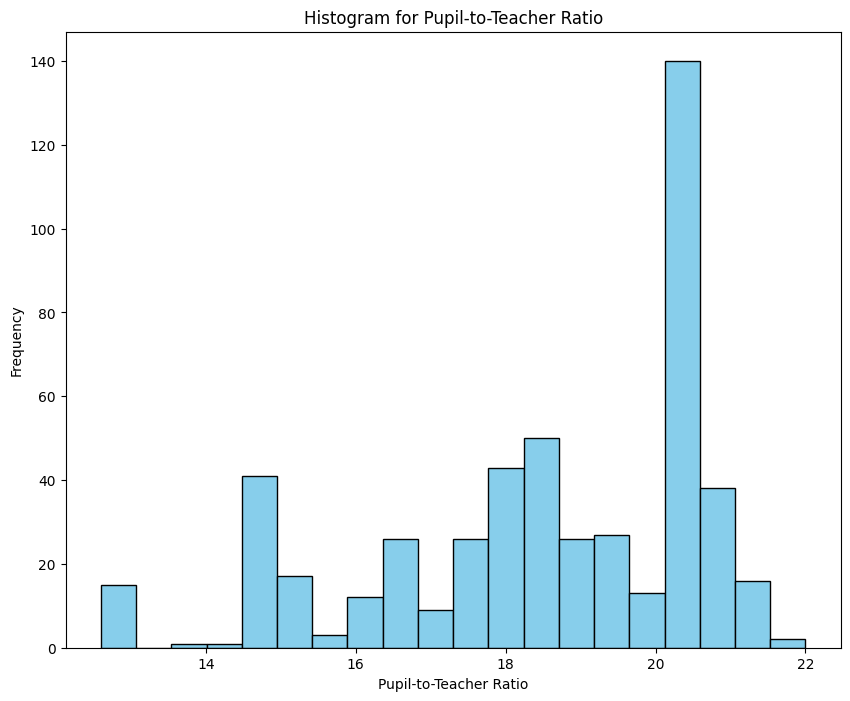

In [31]:
plt.figure(figsize=(10, 8))
plt.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*Hypthesis:* There will be no diffenece in the median values.

In [32]:
from scipy.stats import ttest_ind

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

statistic, p_value = ttest_ind(group1, group0)

print(f'Test Statistic: {statistic}\nP-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values.")

Test Statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median values.


*Conclusion:* There is a significatnt difference in the median values of houses

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*Hypothesis:* There will be a equal variance.

In [33]:
from scipy.stats import f_oneway

result = f_oneway(boston_df['MEDV'][boston_df['AGE_group'] == '35 years and younger'],
                  boston_df['MEDV'][boston_df['AGE_group'] == 'between 35 and 70 years'],
                  boston_df['MEDV'][boston_df['AGE_group'] == '70 years and older'])

p_value = result.pvalue
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis. There is a difference in Median values.")
else:
    print("Fail to reject the null hypothesis. There is no difference in Median values.")


P-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a difference in Median values.


*Conclusion:* The median value is different per building.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*Hypothesis:* It is not correlated to business arces

In [34]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Correlation Coefficient: {corr}\nP-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")


Correlation Coefficient: 0.7636514469209157
P-value: 7.91336106123623e-98
Reject the null hypothesis. There is a significant relationship.


*Conclusion:* There is no correlation between the two.

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*Hypothesis:* There is minimal impact

In [37]:
input_vars = boston_df['DIS']
target_vars = boston_df['MEDV']
input_vars = sm.add_constant(input_vars) 

model = sm.OLS(target_vars, input_vars).fit()
predictions = model.predict(input_vars)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        22:16:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Conclusion:* There is an impact based on distance and house price.